# Data preprocessing

Here below is where data is being imported , a weather dataset from a CSV file (weatherdata--1111422(in).csv) using pd.read_csv() and printing the entire DataFrame using df.to_string(). This allows you to inspect all rows and columns of the dataset, which includes weather attributes such as date, location (longitude, latitude), elevation, temperatures, precipitation, wind, relative humidity, and solar radiation (which currently has missing values).

In [1]:
import pandas as pd
df = pd.read_csv('/Users/michellenyashakuzakwawo/Desktop/Group Project /Model code/weatherdata--1111422 copy.csv',sep=';')
print(df.to_string())


             Date   Longitude  Latitude  Elevation  Max Temperature  Min Temperature  Precipitation       Wind  Relative Humidity      Solar
0        1/1/1979  142.188004  -11.0841          1           28.419           25.154      13.125229   6.931828           0.824205  21.583914
1        1/2/1979  142.188004  -11.0841          1           27.973           24.853      23.355385   6.080869           0.869702  19.647057
2        1/3/1979  142.188004  -11.0841          1           27.772           25.469      39.467525   6.015159           0.874135  23.399940
3        1/4/1979  142.188004  -11.0841          1           26.534           24.851      23.830031   6.421549           0.886061  13.279332
4        1/5/1979  142.188004  -11.0841          1           28.343           24.974       9.088613   6.161690           0.844410  24.058013
5        1/6/1979  142.188004  -11.0841          1           28.437           25.116      15.682979   3.996951           0.860606  25.867130
6        1/7/

Dropping unnecessary columns

Dropping unnecessary columns from the DataFrame.
The columns 'Longitude', 'Latitude', and 'Elevation' are removed because they are not required for the current analysis or modeling.This helps reduce memory usage and keeps only relevant data.

In [2]:
df = df.drop(columns=['Longitude','Latitude', 'Elevation'])

Checking for null values

Checking for null values – Ensures the dataset has no missing data that could cause errors or bias in analysis.

 Checking for null (missing) values in each column.
 df.isnull() creates a DataFrame of True/False for missing values.
.sum() counts the number of True values (nulls) for each column

In [3]:
# Printing the number of null values per column

In [4]:
nulls_per_column = df.isnull().sum()
print("Nulls per column:\n", nulls_per_column)

Nulls per column:
 Date                 0
Max Temperature      0
Min Temperature      0
Precipitation        0
Wind                 0
Relative Humidity    0
Solar                0
dtype: int64


Checking for duplicates 

Checking for duplicates – Ensures all records are unique to prevent skewing results in analysis or training a model.

In [5]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


Displaying Dataframe structure and column information

 Displaying DataFrame structure and column information
 df.info() shows:
 - Number of entries (rows)
 - Column names, non-null counts, and data types
 - Memory usage
 This helps check if any columns have incorrect data types or missing values.

df.info() – Checks column data types and ensures data is as expected before processing.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               12868 non-null  object 
 1   Max Temperature    12868 non-null  float64
 2   Min Temperature    12868 non-null  float64
 3   Precipitation      12868 non-null  float64
 4   Wind               12868 non-null  float64
 5   Relative Humidity  12868 non-null  float64
 6   Solar              12868 non-null  float64
dtypes: float64(6), object(1)
memory usage: 703.8+ KB


Converting 'Date' column to datatime format

Currently, 'Date' is stored as an object (string). 
 Converting it to datetime64 allows for easier time-based operations 
 such as filtering by date, resampling, and plotting time series.

pd.to_datetime() – Standardizes date format for time-series operations and avoids errors in date calculations.

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Verifying the column type change 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12868 entries, 0 to 12867
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               12868 non-null  datetime64[ns]
 1   Max Temperature    12868 non-null  float64       
 2   Min Temperature    12868 non-null  float64       
 3   Precipitation      12868 non-null  float64       
 4   Wind               12868 non-null  float64       
 5   Relative Humidity  12868 non-null  float64       
 6   Solar              12868 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 703.8 KB


Creating the average temperature columns

 This column is calculated as the mean of 'Min Temperature' and 'Max Temperature'.
#This helps in analysis where a single representative temperature is needed.

Creating Average Temperature – Adds a useful derived metric for easier analysis without losing min/max detail.

df.to_string() – Outputs the full dataset for inspection (although in practice, this can be slow for large datasets)

In [9]:
df['Average Temperature']= (df['Min Temperature'] + df['Max Temperature'])/2

In [10]:
# Printing the full DataFrame to view all rows and columns
# df.to_string() prints the entire dataset without truncation.
print(df.to_string())

            Date  Max Temperature  Min Temperature  Precipitation       Wind  Relative Humidity      Solar  Average Temperature
0     1979-01-01           28.419           25.154      13.125229   6.931828           0.824205  21.583914              26.7865
1     1979-01-02           27.973           24.853      23.355385   6.080869           0.869702  19.647057              26.4130
2     1979-01-03           27.772           25.469      39.467525   6.015159           0.874135  23.399940              26.6205
3     1979-01-04           26.534           24.851      23.830031   6.421549           0.886061  13.279332              25.6925
4     1979-01-05           28.343           24.974       9.088613   6.161690           0.844410  24.058013              26.6585
5     1979-01-06           28.437           25.116      15.682979   3.996951           0.860606  25.867130              26.7765
6     1979-01-07           27.728           25.328      20.831109   4.291891           0.879528  21.4199

Reordering the coulmns in the dataframe

Column reordering – Improves readability and ensures consistent structure, especially if the file will be shared or merged with other datasets.


 'new_order' defines the desired sequence of columns for better readability or consistency.
 This is useful for aligning data with a standard format or preferred layout.

In [11]:
new_order = ['Date',
             'Min Temperature',
             'Max Temperature',
             'Average Temperature',
             'Precipitation',
             'Wind',
             'Relative Humidity',
             'Solar']
# Applying the new column order to the DataFrame
df = df[new_order]

Printing DataFrame – Provides a final visual confirmation before saving.

In [12]:
# Printing the full DataFrame to verify that the columns are in the correct order
df

Date  Min Temperature  Max Temperature  Average Temperature  \
0     1979-01-01           25.154           28.419              26.7865   
1     1979-01-02           24.853           27.973              26.4130   
2     1979-01-03           25.469           27.772              26.6205   
3     1979-01-04           24.851           26.534              25.6925   
4     1979-01-05           24.974           28.343              26.6585   
...          ...              ...              ...                  ...   
12863 2014-07-27           24.404           25.289              24.8465   
12864 2014-07-28           24.241           25.330              24.7855   
12865 2014-07-29           24.001           24.962              24.4815   
12866 2014-07-30           23.743           25.913              24.8280   
12867 2014-07-31           23.559           25.811              24.6850   

       Precipitation      Wind  Relative Humidity      Solar  
0          13.125229  6.931828           0.824205  21.583914  
1          23.355385  6.080869           0.869702  19.647057  
2          39.467525  6.015159           0.874135  23.399940  
3          23.830031  6.421549           0.886061  13.279332  
4           9.088613  6.161690           0.844410  24.058013  
...              ...       ...                ...        ...  
12863       1.453972  9.011771           0.783307   9.885823  
12864       0.175095  7.151790           0.768778  12.207088  
12865       0.199127  7.633007           0.774392  12.285095  
12866       0.260925  7.939729           0.751937  15.678037  
12867       0.058365  6.489073           0.756435  20.969728  

[12868 rows x 8 columns]

In [13]:
# Edit the names to represent the units

df.rename(columns={ 
    "Min Temperature":"Min Temperature(°C)",
    "Max Temperature": "Max Temperature(°C)",
    "Average Temperature":"Average Temperature(°C)",
    "Precipitation": "Precipitation(mm)", 
    "Wind": "Wind(km/h)", 
    "Solar": "Solar(W/m²)" 
}, inplace=True)


In [14]:
df

Date  Min Temperature(°C)  Max Temperature(°C)  \
0     1979-01-01               25.154               28.419   
1     1979-01-02               24.853               27.973   
2     1979-01-03               25.469               27.772   
3     1979-01-04               24.851               26.534   
4     1979-01-05               24.974               28.343   
...          ...                  ...                  ...   
12863 2014-07-27               24.404               25.289   
12864 2014-07-28               24.241               25.330   
12865 2014-07-29               24.001               24.962   
12866 2014-07-30               23.743               25.913   
12867 2014-07-31               23.559               25.811   

       Average Temperature(°C)  Precipitation(mm)  Wind(km/h)  \
0                      26.7865          13.125229    6.931828   
1                      26.4130          23.355385    6.080869   
2                      26.6205          39.467525    6.015159   
3                      25.6925          23.830031    6.421549   
4                      26.6585           9.088613    6.161690   
...                        ...                ...         ...   
12863                  24.8465           1.453972    9.011771   
12864                  24.7855           0.175095    7.151790   
12865                  24.4815           0.199127    7.633007   
12866                  24.8280           0.260925    7.939729   
12867                  24.6850           0.058365    6.489073   

       Relative Humidity  Solar(W/m²)  
0               0.824205    21.583914  
1               0.869702    19.647057  
2               0.874135    23.399940  
3               0.886061    13.279332  
4               0.844410    24.058013  
...                  ...          ...  
12863           0.783307     9.885823  
12864           0.768778    12.207088  
12865           0.774392    12.285095  
12866           0.751937    15.678037  
12867           0.756435    20.969728  

[12868 rows x 8 columns]

In [15]:
# Rounding off all values to 3 decimal places for consistency values across dataset 

df[df.select_dtypes(include="number").columns] =df.select_dtypes(include="number").round(3) 

In [16]:
#Seperating Year , month for easy trend visualisation 

df["Year"] = df["Date"].dt.year  
df["Month"] = df["Date"].dt.month 
df["Month_Name"] = df["Date"].dt.month_name() 

In [53]:
new_order = ['Date',
             'Year',
             'Month',
             'Month_Name',
             'Min Temperature(°C)',
             'Max Temperature(°C)',
             'Average Temperature(°C)',
             'Precipitation(mm)',
             'Wind(km/h)',
             'Relative Humidity',
             'Solar(W/m²)']
# Applying the new column order to the DataFrame
df = df[new_order]

In [ ]:
df

Saving to CSV – Stores the cleaned, well-formatted dataset for later analysis, sharing, or modeling.

In [18]:
# Exporting the cleaned and formatted DataFrame to a CSV file
# index=False ensures that the DataFrame's index is not written as a separate column in the CSV.
# This makes the file cleaner and easier to use in other tools.

df.to_csv('/Users/michellenyashakuzakwawo/Desktop/Group Project /Model code/weatherdata_cleaned.csv', index=False)

# Exploration data Analysis


## 1.  Overview and Basic Discriptive statistics 

#### Hypotheses / Questions:

1. Are there missing or erroneous values that could bias the models?

2. Are the ranges realistic (e.g., Min Temp not greater than Max Temp, wind speeds not negative values)?

#### What we checking 
##### Variance & Standard Deviation
**High variance** - variable fluctuates a lot, may contain predictive power.
**Low variance** - variable nearly constant.
##### Skewness
**Strongly skewed data** - may need transformation (e.g., log for precipitation).
**Skewness** > |2| often means outliers or heavy tails.
##### Kurtosis
**High kurtosis (>3)** - extreme outliers/events are common (e.g., sudden heavy rainfall).
**Low kurtosis (<3)** - values are more evenly spread.
#### Impact on model choice:
**Linear Regression**
Works best when predictors are not heavily skewed, variances are meaningful, and no extreme outliers dominate.
If strong skew/outliers exist, linear regression may give biased estimates. - Transformations or robust regression needed.
**General model impact**
High variance variables - suitable for models that can capture variability (tree-based models, neural nets).
Low variance - may be dropped since they don’t add predictive power.

In [50]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [20]:

# Basic descriptive stats (transposing for readability)
summary_stats = df.describe().T

# Calculating extra statistics
extra_stats = pd.DataFrame({
    "variance": df.var(numeric_only=True),
    "skewness": df.skew(numeric_only=True),
    "kurtosis": df.kurt(numeric_only=True)})

# Merging both tables
full_summary = summary_stats.merge(extra_stats, 
                                   left_index=True, 
                                   right_index=True)

# Resetting index and rename for clarity
full_summary = full_summary.reset_index().rename(columns={'index': 'Feature'})

# Format numbers for readability
pd.set_option('display.float_format', '{:.3f}'.format)

#priniting the dataframe table 
full_summary



Feature     count     mean      min      25%      50%  \
0      Min Temperature(°C) 12868.000   24.548   15.399   23.539   24.773   
1      Max Temperature(°C) 12868.000   30.935   22.082   29.030   30.557   
2  Average Temperature(°C) 12868.000   27.742   21.376   26.645   27.735   
3        Precipitation(mm) 12868.000    4.676    0.000    0.000    0.283   
4               Wind(km/h) 12868.000    4.249    0.597    2.847    4.276   
5        Relative Humidity 12868.000    0.710    0.404    0.643    0.706   
6              Solar(W/m²) 12868.000   21.488    0.000   18.669   23.039   
7                     Year 12868.000 1996.351 1979.000 1987.000 1996.000   
8                    Month 12868.000    6.501    1.000    4.000    7.000   

       75%      max    std  variance  skewness  kurtosis  
0   25.650   29.645  1.698     2.882    -0.543     0.909  
1   32.660   44.570  2.896     8.386     0.620     0.815  
2   28.816   34.746  1.702     2.895     0.097     0.349  
3    5.006  225.427 10.363   107.398     5.421    54.377  
4    5.436   17.281  1.758     3.089     0.547     1.166  
5    0.776    0.942  0.087     0.008     0.146    -0.711  
6   26.708   29.688  6.456    41.675    -1.090     0.464  
7 2005.000 2014.000 10.286   105.804    -0.006    -1.201  
8    9.000   12.000  3.436    11.808     0.008    -1.204

### Monthly Summary Statistics 

In [21]:

# function to compute descriptive stats for one group (month)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #removing identifier columns (Date, Year, Month) only want month Name
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all months
all_months_summary = []
for month, group in df.groupby("Month_Name"):
    stats = descriptive_stats(group)
    stats.insert(0, "Month_Name", month)
    all_months_summary.append(stats)

all_months_summary = pd.concat(all_months_summary, ignore_index=True)

#printing the dataframe 
all_months_summary.head(10)


Month_Name                  Feature    count   mean    min    25%    50%  \
0      April      Min Temperature(°C) 1080.000 25.166 21.063 24.511 25.075   
1      April      Max Temperature(°C) 1080.000 30.444 24.237 29.297 30.442   
2      April  Average Temperature(°C) 1080.000 27.805 23.178 27.224 27.817   
3      April        Precipitation(mm) 1080.000  4.256  0.000  0.010  0.984   
4      April               Wind(km/h) 1080.000  3.912  0.647  2.810  3.952   
5      April        Relative Humidity 1080.000  0.751  0.536  0.691  0.745   
6      April              Solar(W/m²) 1080.000 20.841  0.747 19.250 22.760   
7     August      Min Temperature(°C) 1085.000 22.781 15.399 21.994 22.866   
8     August      Max Temperature(°C) 1085.000 29.209 23.400 27.509 29.483   
9     August  Average Temperature(°C) 1085.000 25.995 22.307 25.187 25.999   

     75%     max   std  variance  skewness  kurtosis  
0 25.750  29.517 1.098     1.205     0.200     0.901  
1 31.513  37.672 1.664     2.768     0.119     0.793  
2 28.421  31.386 0.964     0.930    -0.240     0.989  
3  5.144 109.491 8.492    72.120     5.359    45.267  
4  4.898  10.581 1.469     2.159     0.345     0.566  
5  0.807   0.939 0.076     0.006     0.111    -0.762  
6 24.079  26.565 4.903    24.036    -1.687     2.556  
7 23.731  26.294 1.447     2.093    -0.757     2.005  
8 30.660  38.141 2.269     5.149     0.141     0.298  
9 26.814  30.370 1.247     1.555     0.064     0.177

### Yearly summary statistics 

In [22]:
# function to compute descriptive stats for one group (a year)
def descriptive_stats(df):
    stats = df.describe().T
    stats["variance"] = df.var(numeric_only=True)
    stats["skewness"] = df.skew(numeric_only=True)
    stats["kurtosis"] = df.kurt(numeric_only=True)
    stats = stats.reset_index().rename(columns={"index":"Feature"})

    #dropping unwanted identifier features
    stats = stats[~stats["Feature"].isin(["Date","Year","Month"])]

    return stats

# building descriptive stats for all years
all_years_summary = []
for year, group in df.groupby("Year"):
    stats = descriptive_stats(group)
    stats.insert(0, "Year", year)
    all_years_summary.append(stats)

all_years_summary = pd.concat(all_years_summary, ignore_index=True)

#Printing that data frame
all_years_summary.head(10)


Year                  Feature   count   mean    min    25%    50%    75%  \
0  1979      Min Temperature(°C) 365.000 23.955 19.105 23.048 24.253 25.035   
1  1979      Max Temperature(°C) 365.000 30.627 24.249 28.840 30.039 32.193   
2  1979  Average Temperature(°C) 365.000 27.291 22.642 26.335 27.160 28.212   
3  1979        Precipitation(mm) 365.000  4.527  0.000  0.000  0.106  4.008   
4  1979               Wind(km/h) 365.000  4.466  1.290  3.441  4.609  5.532   
5  1979        Relative Humidity 365.000  0.700  0.498  0.626  0.676  0.779   
6  1979              Solar(W/m²) 365.000 21.508  0.764 18.860 23.364 26.672   
7  1980      Min Temperature(°C) 366.000 24.240 19.738 23.241 24.506 25.291   
8  1980      Max Temperature(°C) 366.000 31.156 24.107 29.310 30.863 33.059   
9  1980  Average Temperature(°C) 366.000 27.698 23.045 26.630 27.689 28.828   

     max   std  variance  skewness  kurtosis  
0 27.178 1.439     2.071    -0.640    -0.095  
1 43.461 2.896     8.385     0.961     1.919  
2 33.448 1.652     2.730     0.260     0.773  
3 56.549 9.344    87.318     2.902     9.401  
4 10.995 1.499     2.247    -0.053     0.189  
5  0.939 0.099     0.010     0.432    -0.860  
6 29.268 6.672    44.519    -1.064     0.218  
7 26.640 1.314     1.726    -0.567    -0.367  
8 42.015 2.920     8.528     0.276     0.183  
9 32.577 1.738     3.020    -0.068    -0.127

## 2. Distribution Analysis 

#### Hypotheses / Questions:

3. Do weather variables follow normal or skewed distributions?
4. Are there extreme values (e.g., heatwaves, heavy rain) that might affect models?

##### Why it’s beneficial:
Shows how each variable is shaped (normal, skewed, multimodal).
Identifies outliers that could distort regression coefficients or cause overfitting.
Seasonally split distributions reveal climate patterns (e.g., high solar in summer, low in winter).
##### What we looking for:
**Histogram tails**  heavy tails suggest outliers/extreme events.
**Boxplots** - points outside 1.5×IQR are statistical outliers.
**Bimodal distributions** - might indicate seasonal split (e.g., solar radiation summer vs. winter).
##### Impact on model choice:
**Linear Regression**
Assumes normally distributed residuals; strongly skewed predictors can violate assumptions.
May need log/Box-Cox transformations for precipitation or wind speed.
**General models**
Tree-based models (Random Forest, Gradient Boosting) handle skewness/outliers naturally.
Neural nets can model multimodal distributions if enough data.

In [36]:


#Making sure Date is datetime (needed for month plots)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

MIN_TEMP = "Min Temperature(°C)"
MAX_TEMP = "Max Temperature(°C)"
AVG_TEMP = "Average Temperature(°C)"
PRECIP   = "Precipitation(mm)"
WIND     = "Wind(km/h)"
RH       = "Relative Humidity"
SOLAR    = "Solar(W/m²)"
YEAR     = "Year"
MONTH    = "Month"
MONTH_NAME = "Month_Name"

# Extracting numeric columns we’ll use repeatedly
NUM_COLS = [MIN_TEMP, MAX_TEMP, AVG_TEMP, PRECIP, WIND, RH, SOLAR]

# Quick preview
df.head()


Date  Min Temperature(°C)  Max Temperature(°C)  \
0 1979-01-01               25.154               28.419   
1 1979-01-02               24.853               27.973   
2 1979-01-03               25.469               27.772   
3 1979-01-04               24.851               26.534   
4 1979-01-05               24.974               28.343   

   Average Temperature(°C)  Precipitation(mm)  Wind(km/h)  Relative Humidity  \
0                   26.786             13.125       6.932              0.824   
1                   26.413             23.355       6.081              0.870   
2                   26.620             39.468       6.015              0.874   
3                   25.692             23.830       6.422              0.886   
4                   26.658              9.089       6.162              0.844   

   Solar(W/m²)  Year  Month Month_Name  Extreme_Days_Max Temperature(°C)  \
0       21.584  1979      1    January                             False   
1       19.647  1979      1    January                             False   
2       23.400  1979      1    January                             False   
3       13.279  1979      1    January                             False   
4       24.058  1979      1    January                             False   

   Extreme_Days_Min Temperature(°C)  Extreme_Days_Precipitation(mm)  \
0                             False                           False   
1                             False                           False   
2                             False                           False   
3                             False                           False   
4                             False                           False   

   Extreme_Days_Wind(km/h)  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False

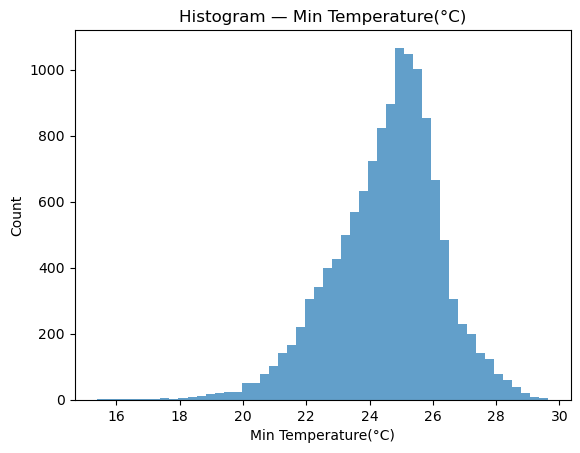

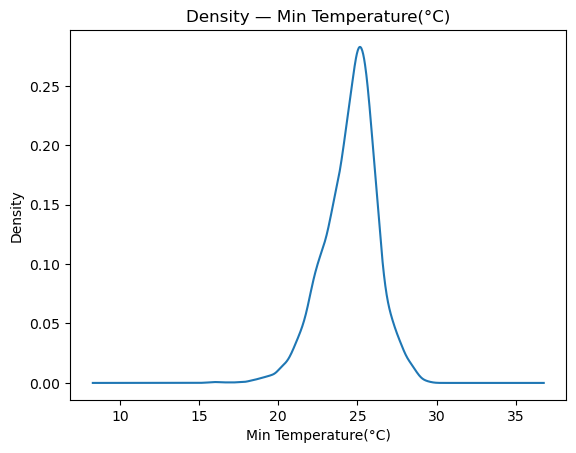

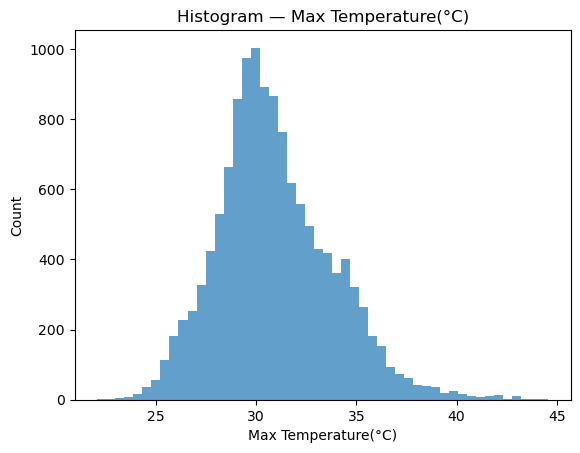

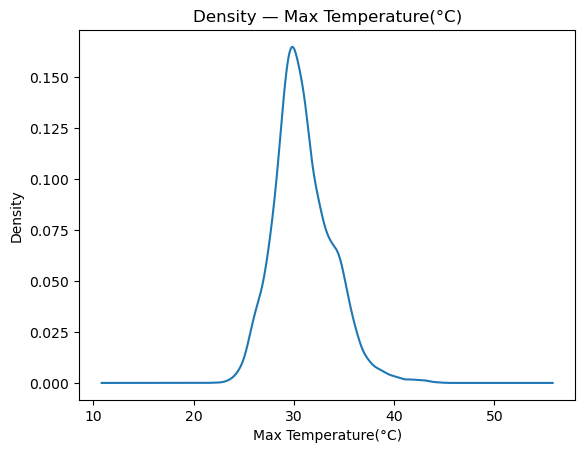

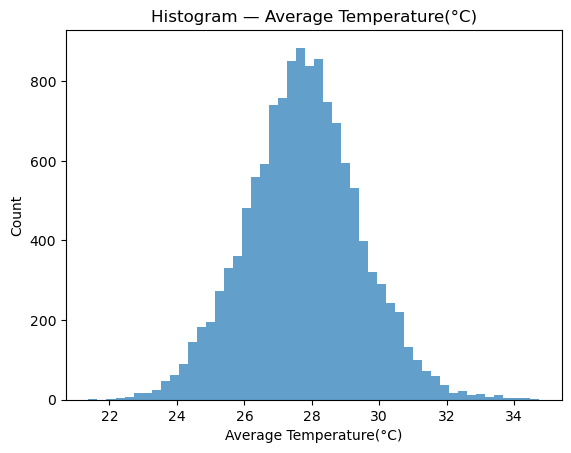

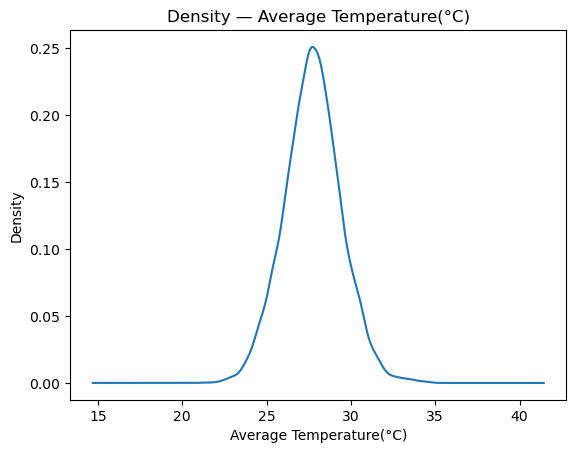

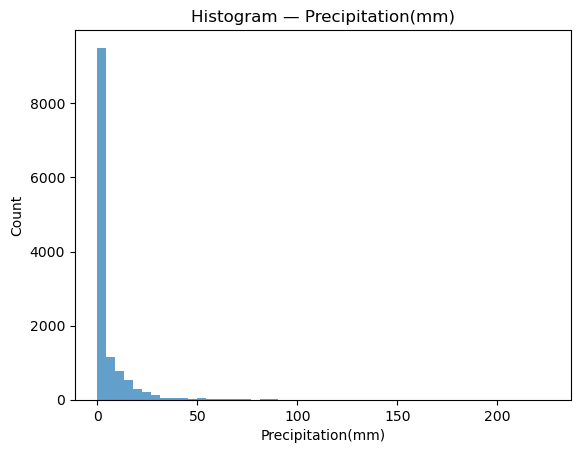

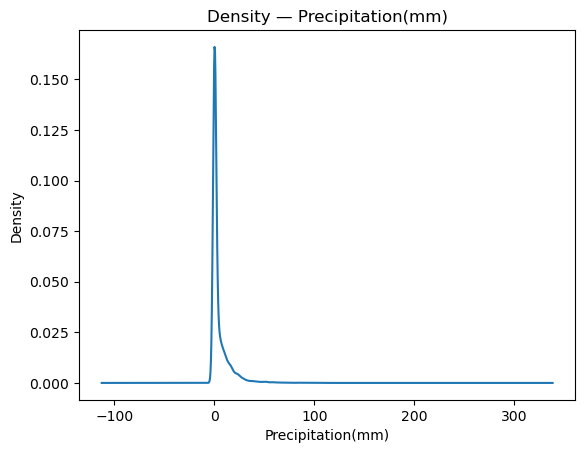

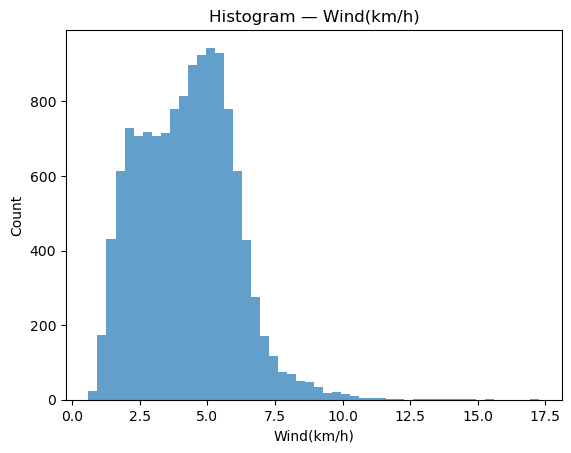

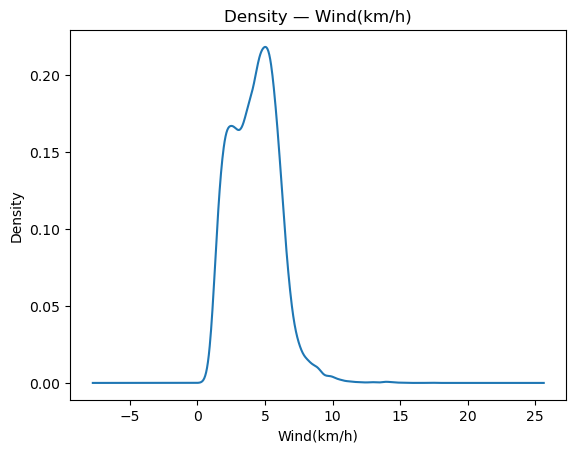

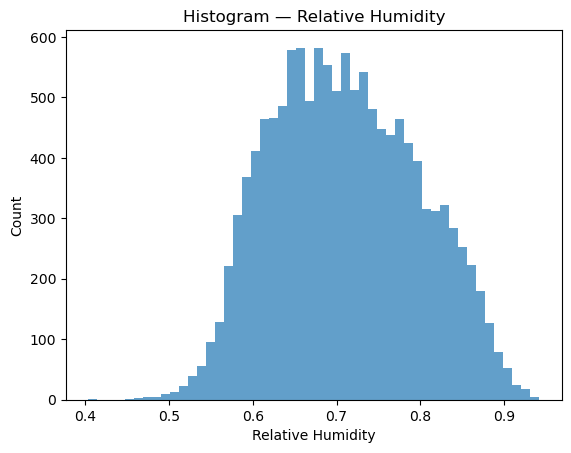

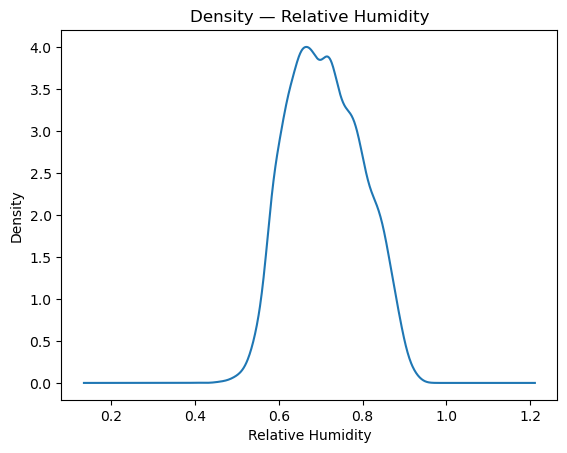

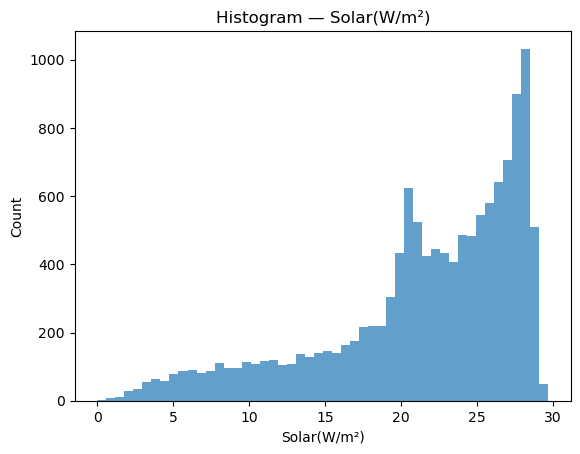

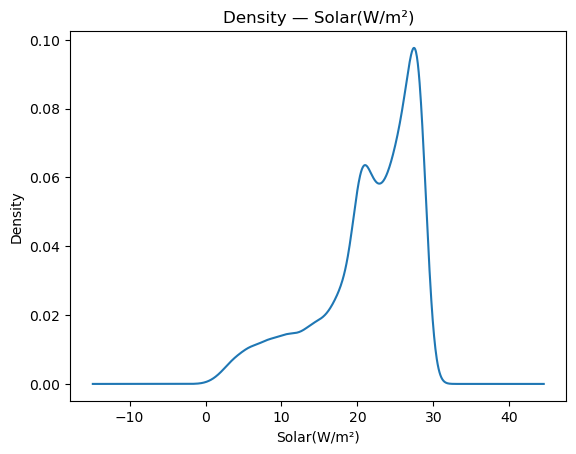

In [30]:
# Plotting Histograms and denstity plot to check if variables look normal or skewed

for col in NUM_COLS:
    data = df[col].dropna()

    # Histogram
    plt.figure()
    plt.hist(data, bins=50, alpha=0.7)   
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Density (KDE)
    plt.figure()
    data.plot(kind="density")
    plt.title(f"Density — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


Here trying to check for dots far from the box/whiskers = potential extreme events (e.g., heavy rain days, heat spikes).

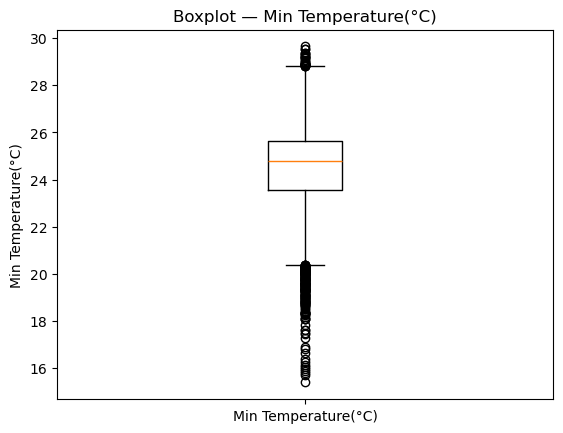

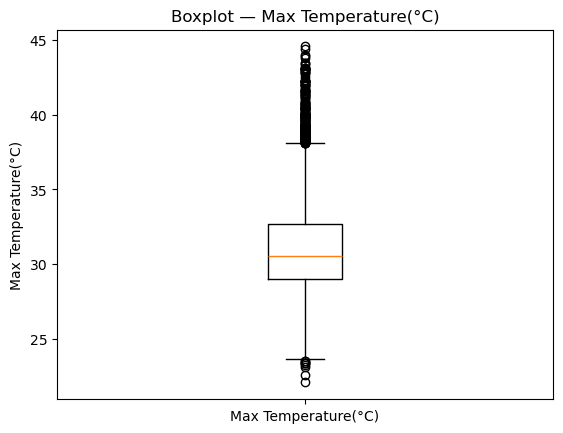

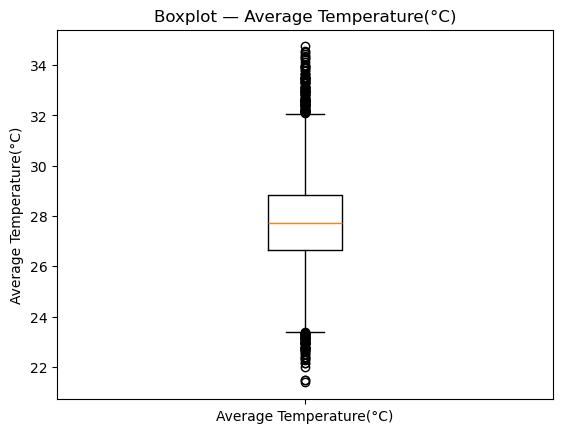

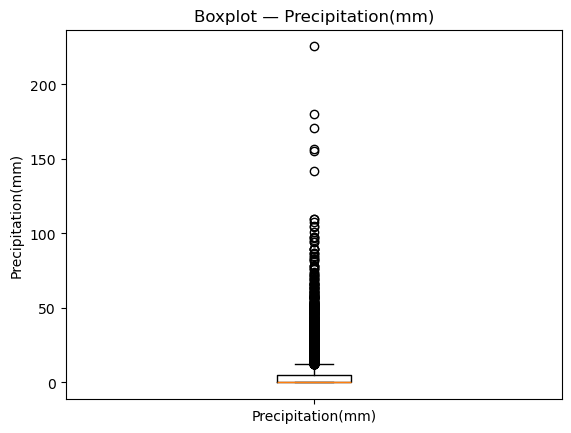

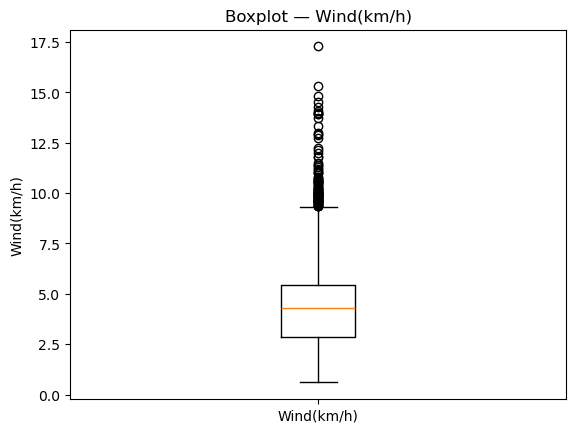

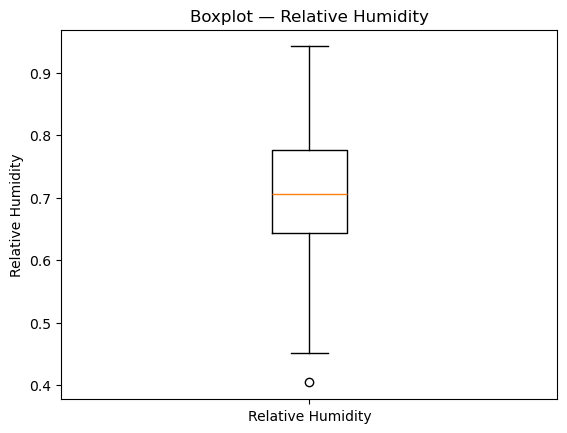

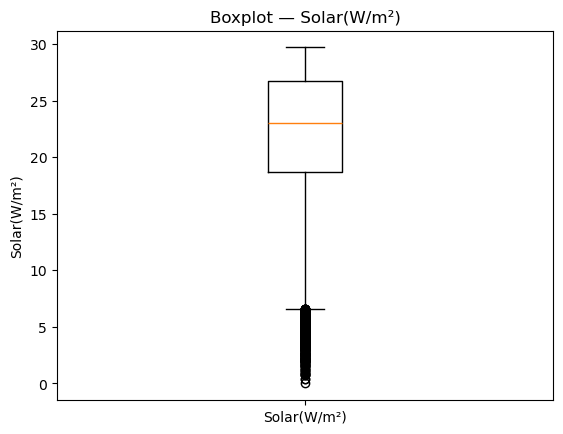

In [31]:

# Boxplots to Spot extreme (Outliers) values that might affect/ bias models.

for col in NUM_COLS:
    plt.boxplot(df[col].dropna().values, vert=True, labels=[col], showfliers=True)
    plt.title(f"Boxplot — {col}")
    plt.ylabel(col)
    plt.show()


Checking for temporal analysis to see if this reveals his reveals annual cycles (e.g., more rain in some months , more solar radiation in mid-year)

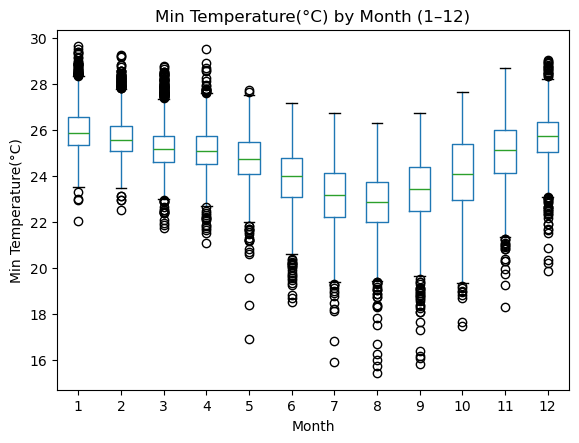

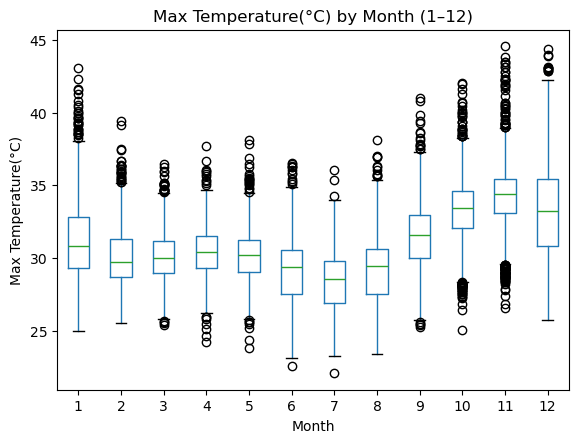

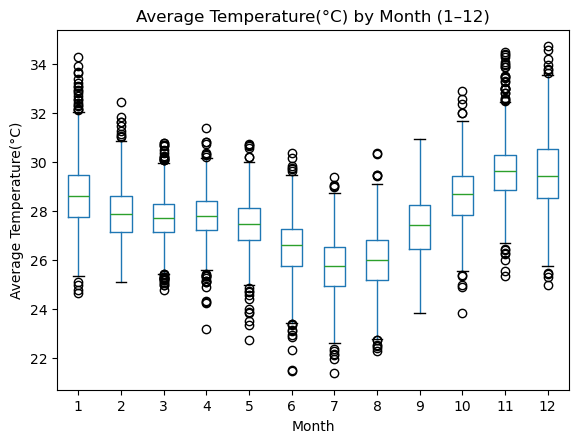

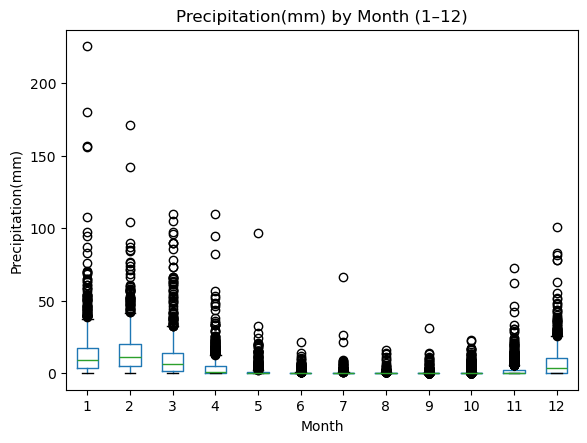

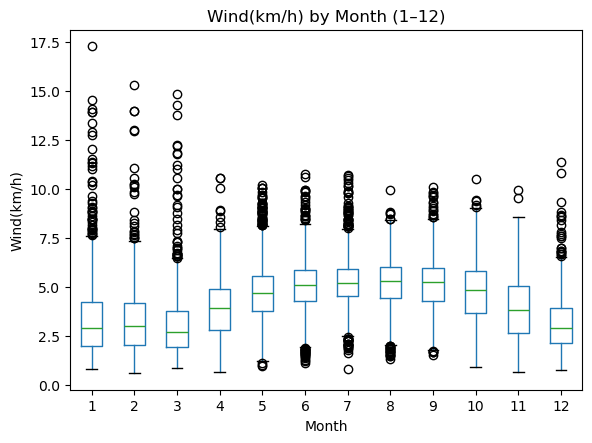

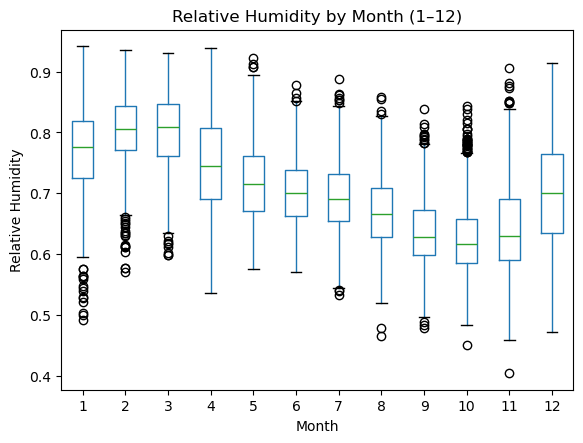

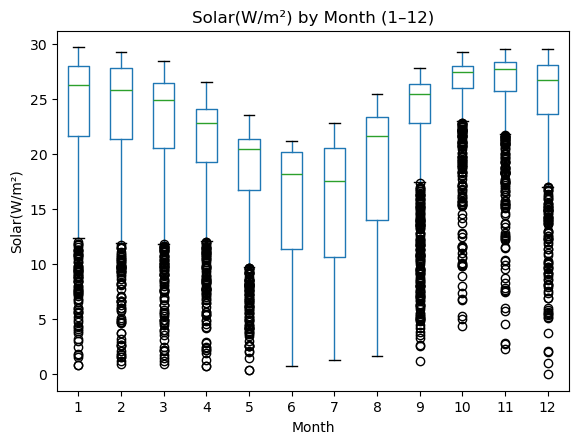

In [32]:

if MONTH not in df.columns:
    df[MONTH] = df["Date"].dt.month

# Boxplots by month for each variable
for col in NUM_COLS:
    df.boxplot(column=col, by=MONTH, grid=False)
    plt.title(f"{col} by Month (1–12)"); plt.suptitle("")  # removing extra title
    plt.xlabel("Month"); plt.ylabel(col)
    plt.show()





Extreme Events, defining extremes using quantiles (e.g., “top 1% of max temperature values”

In [33]:
# Choosing which variables to flag for extremes 
extreme_values = {
    MAX_TEMP:0.99,   # top 1% max temperatures
    MIN_TEMP:0.99,
    PRECIP:0.99,   # top 1% precipitation
    WIND:0.99,}   # top 1% wind

# Creating the flags
for col, i in extreme_values.items():
    thresh = df[col].quantile(i)
    flag_col = f"Extreme_Days_{col}"
    df[flag_col] = df[col] > thresh
    print(f"{col}: threshold for top {int((1-i)*100)}% = {thresh:.3f}")

# Counting the number of days there was extreme events in the data set 
flag_cols = [c for c in df.columns if c.startswith("Extreme_Days_")]
extreme_counts = df[flag_cols].sum().sort_values(ascending=False)
print("\nNumber of days Extreme events occured :")
print(extreme_counts)


Max Temperature(°C): threshold for top 1% = 39.142
Min Temperature(°C): threshold for top 1% = 28.218
Precipitation(mm): threshold for top 1% = 49.311
Wind(km/h): threshold for top 1% = 8.950

Number of days Extreme events occured :
Extreme_Days_Max Temperature(°C)    129
Extreme_Days_Min Temperature(°C)    129
Extreme_Days_Wind(km/h)             129
Extreme_Days_Precipitation(mm)      128
dtype: int64


## 3. Time Series and Seasonal Patterns  

#### Hypotheses / Questions:

5. Do temperatures and other variables show clear seasonality?
6. Are there long-term trends (warming, cooling, rainfall changes)?

##### Why it’s beneficial:
Weather data is inherently temporal and seasonal.
Reveals cycles (daily, monthly, yearly) and long-term trends.
Rolling averages help detect climate change signals or data drift.
##### What we looking for :
**Autocorrelation** 
Strong autocorrelation - past values highly predictive of future ones.
**Seasonal peaks**
Clear yearly or monthly cycles - seasonal features must be included.
**Trend slopes**
Upward temperature trend - stationarity assumption violated (linear regression without detrending may fail).
##### Impact on model choice:
**Linear Regression**
May need to add lagged variables (yesterday’s temperature, last week’s average).
Works if trend/seasonality is modeled explicitly.
**General models**
Time-series models (ARIMA, LSTM) are better suited for autocorrelated, seasonal data.
If strong seasonality is observed - sequence models outperform plain regression.

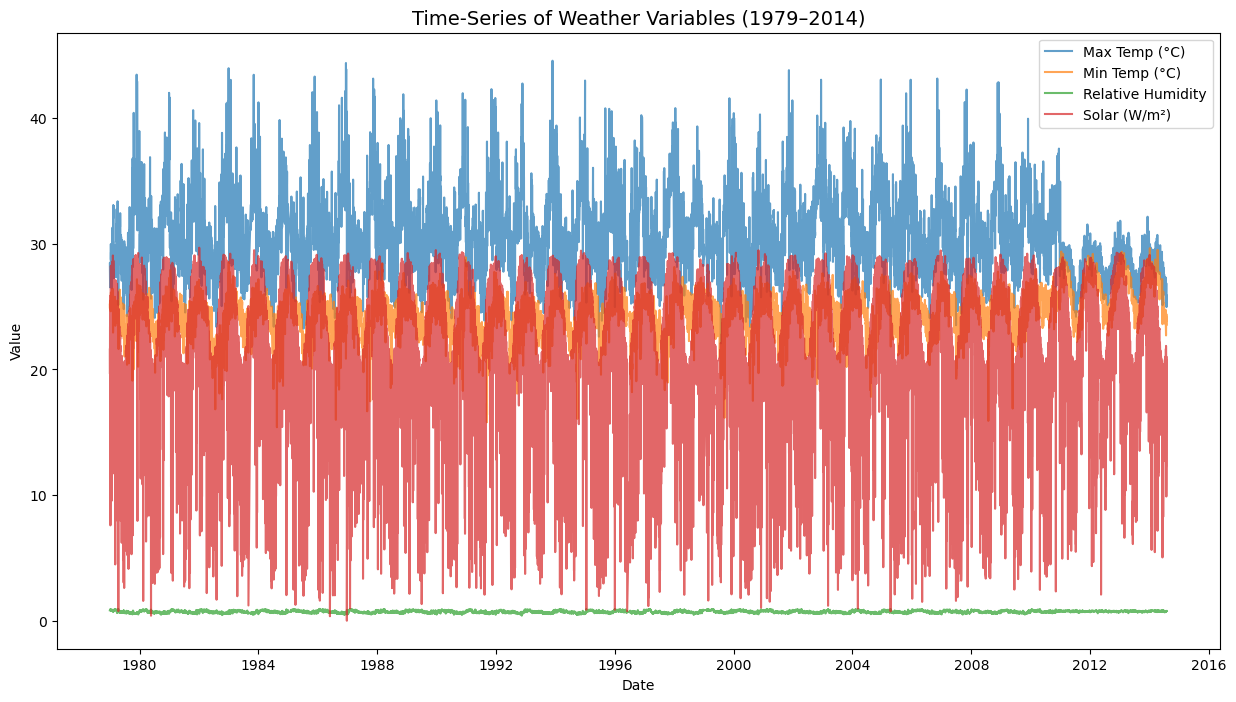

In [34]:

# Plotting line graphs for selected climate variables over time
plt.figure(figsize=(15,8))

# Plotting Max Temp and Min Temp
plt.plot(df['Date'], df['Max Temperature(°C)'], label="Max Temp (°C)", alpha=0.7)
plt.plot(df['Date'], df['Min Temperature(°C)'], label="Min Temp (°C)", alpha=0.7)

# Plotting Humidity and Solar
plt.plot(df['Date'], df['Relative Humidity'], label="Relative Humidity", alpha=0.7)
plt.plot(df['Date'], df['Solar(W/m²)'], label="Solar (W/m²)", alpha=0.7)

plt.title("Time-Series of Weather Variables (1979–2014)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


This graph above shows how each variable changed across the full timeline. We can spot warming/cooling or unusual years

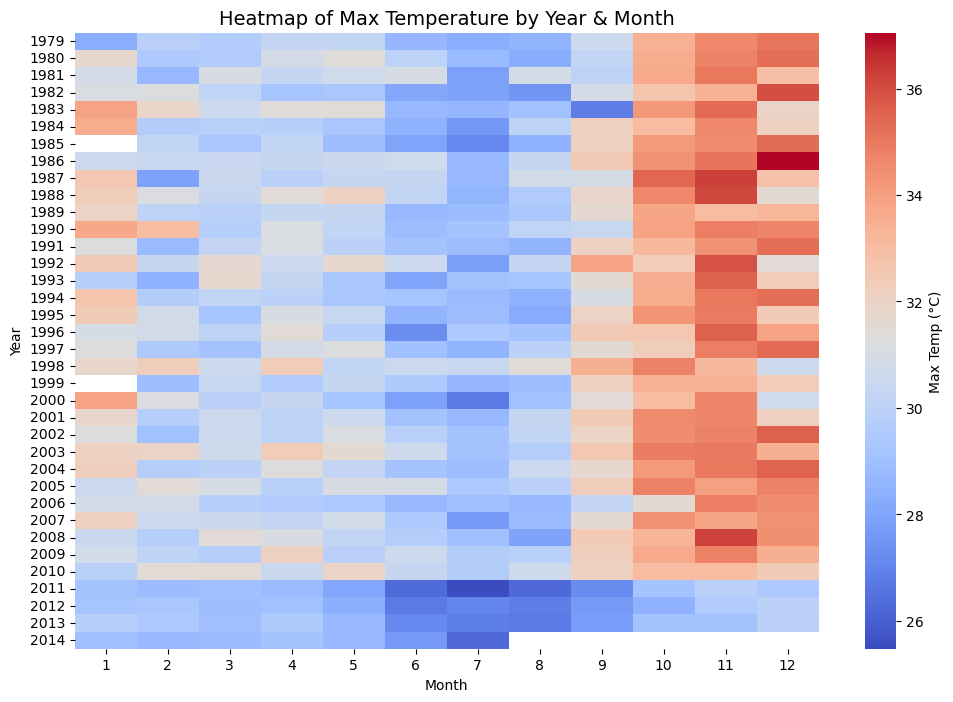

In [37]:
#Monthly / Seasonal breakdown

# Pivot table: average Max Temp per year-month
heatmap_data = df.pivot_table(values="Max Temperature(°C)", index="Year", columns="Month", aggfunc="mean")

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap="coolwarm", cbar_kws={'label': 'Max Temp (°C)'})
plt.title("Heatmap of Max Temperature by Year & Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


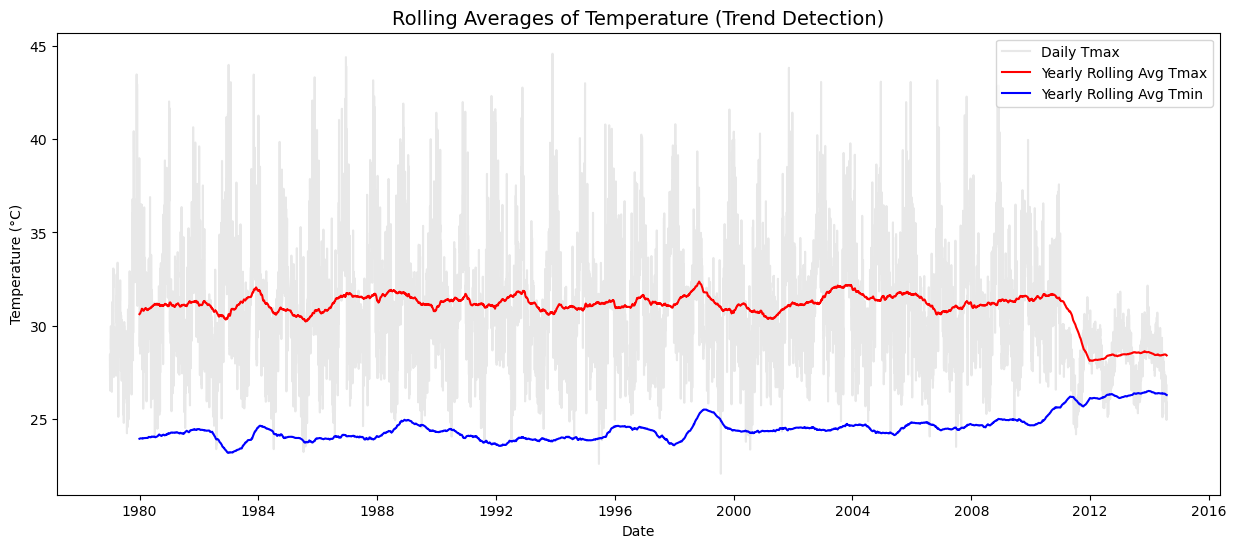

In [38]:
# Rolling averages & smoothing

# Adding rolling averages (365 days ~ 1 year window)
df['Tmax_Rolling'] = df['Max Temperature(°C)'].rolling(window=365).mean()
df['Tmin_Rolling'] = df['Min Temperature(°C)'].rolling(window=365).mean()

# Plotting original vs rolling average
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Max Temperature(°C)'], color='lightgray', alpha=0.5, label="Daily Tmax")
plt.plot(df['Date'], df['Tmax_Rolling'], color='red', label="Yearly Rolling Avg Tmax")
plt.plot(df['Date'], df['Tmin_Rolling'], color='blue', label="Yearly Rolling Avg Tmin")

plt.title("Rolling Averages of Temperature (Trend Detection)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


The graph above with rolling average temperatures removes noise and makes long-term warming/cooling easier to see.

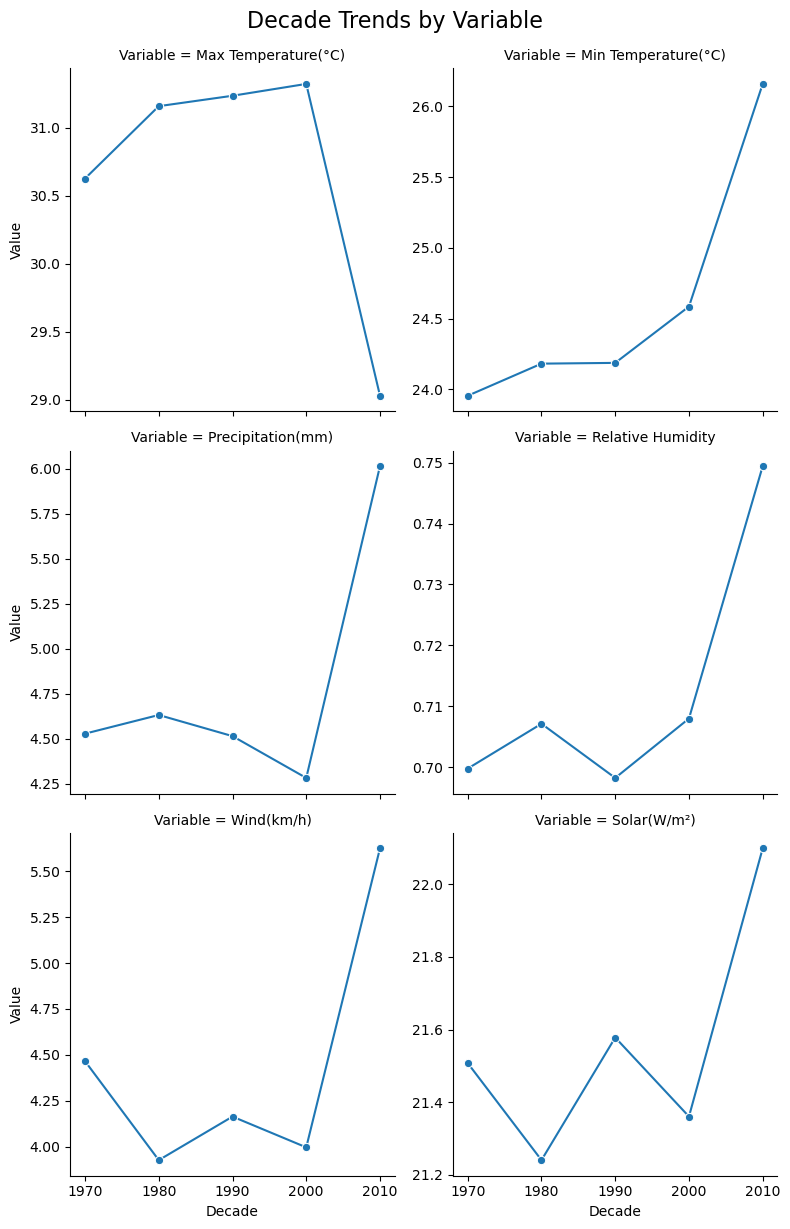

In [41]:
# Trend comparison across decades

# selecting the columns needed 
cols = ['Max Temperature(°C)','Min Temperature(°C)','Precipitation(mm)',
        'Relative Humidity','Wind(km/h)','Solar(W/m²)']
cols = [c for c in cols if c in df.columns]                 # keeping only columns that exist
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')   # checking if values are numeric
df['Decade'] = (df['Year'] // 10) * 10                      # decade key

# decade averages -> long form for faceting
decade_avg  = df.groupby('Decade')[cols].mean(numeric_only=True)
decade_long = decade_avg.reset_index().melt(
    id_vars='Decade', var_name='Variable', value_name='Value'
).dropna(subset=['Value'])

# Removing FutureWarning from seaborn/pandas about use_inf_as_na
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*", category=FutureWarning)

# Melting data for facet plotting
decade_long = decade_avg.reset_index().melt(id_vars="Decade", var_name="Variable", value_name="Value")

# Facet plot
plot = sns.FacetGrid(decade_long, col="Variable", col_wrap=2, sharey=False, height=4)
plot.map(sns.lineplot, "Decade", "Value", marker="o")
plot.fig.suptitle("Decade Trends by Variable", fontsize=16, y=1.02)
plt.show()


## 4. Correlation relationship and Analysis 

#### Hypotheses / Questions:

1. Is temperature strongly correlated with solar radiation and humidity?
2. Do wind and precipitation add predictive power or are they weakly related?

##### Why it’s beneficial:
Shows how predictors interact with temperature (the target).
Identifies multicollinearity (predictors too correlated with each other).
Helps prioritize which variables should go into the model.
##### What we looking for:
Correlation with target (Max temp/Min Temp)
High correlation (e.g., solar vs Max Temp = 0.7) - strong predictor.
Low correlation (wind vs Tmax = 0.1) - may not add much value.
**Multicollinearity among predictors**
If two predictors are highly correlated (humidity vs precipitation, r > 0.85), one may be redundant.
Partial correlations
Example: humidity negatively correlated with Max Temp, even when solar is controlled.
##### Impact on model choice:
**Linear Regression**
Assumes low multicollinearity.
High collinearity inflates coefficients (unstable results). Variance Inflation Factor (VIF) can be checked; VIF > 10 = problematic.
Strong predictor-target correlations mean regression could perform well.
**General models**
Tree-based models (Random Forest, XGBoost) handle multicollinearity better, automatically choosing dominant splits.
Neural networks can learn nonlinear interactions (e.g., Max Temp rising with solar but only when humidity is low).

In [54]:
#Computing Correlation Matrices
#Checking both Pearson (linear relationships) and Spearman (monotonic relationships, more robust to non-linearity).



# Numeric columns of interest
numeric_cols = ['Min Temperature(°C)', 'Max Temperature(°C)', 'Average Temperature(°C)', 
                'Precipitation(mm)', 'Wind(km/h)', 'Relative Humidity', 'Solar(W/m²)']

# Computing correlations
pearson_corr = df[numeric_cols].corr(method='pearson')
spearman_corr = df[numeric_cols].corr(method='spearman')

# Converting to DataFrames for better visualization
pearson_df = pd.DataFrame(pearson_corr)
spearman_df = pd.DataFrame(spearman_corr)

# Displaying them side by side 

print("Pearson Correlation Matrix")
display(pearson_df)

print(" Spearman Correlation Matrix")
display(spearman_df)



Pearson Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                    1.000                0.032   
Max Temperature(°C)                    0.032                1.000   
Average Temperature(°C)                0.526                0.867   
Precipitation(mm)                      0.286               -0.201   
Wind(km/h)                             0.069               -0.424   
Relative Humidity                      0.361               -0.487   
Solar(W/m²)                            0.135                0.614   

                         Average Temperature(°C)  Precipitation(mm)  \
Min Temperature(°C)                        0.526              0.286   
Max Temperature(°C)                        0.867             -0.201   
Average Temperature(°C)                    1.000             -0.028   
Precipitation(mm)                         -0.028              1.000   
Wind(km/h)                                -0.326             -0.050   
Relative Humidity                         -0.234              0.568   
Solar(W/m²)                                0.589             -0.079   

                         Wind(km/h)  Relative Humidity  Solar(W/m²)  
Min Temperature(°C)           0.069              0.361        0.135  
Max Temperature(°C)          -0.424             -0.487        0.614  
Average Temperature(°C)      -0.326             -0.234        0.589  
Precipitation(mm)            -0.050              0.568       -0.079  
Wind(km/h)                    1.000             -0.204       -0.254  
Relative Humidity            -0.204              1.000       -0.309  
Solar(W/m²)                  -0.254             -0.309        1.000

 Spearman Correlation Matrix


Min Temperature(°C)  Max Temperature(°C)  \
Min Temperature(°C)                    1.000                0.063   
Max Temperature(°C)                    0.063                1.000   
Average Temperature(°C)                0.547                0.838   
Precipitation(mm)                      0.477               -0.273   
Wind(km/h)                            -0.011               -0.398   
Relative Humidity                      0.382               -0.510   
Solar(W/m²)                            0.186                0.630   

                         Average Temperature(°C)  Precipitation(mm)  \
Min Temperature(°C)                        0.547              0.477   
Max Temperature(°C)                        0.838             -0.273   
Average Temperature(°C)                    1.000              0.024   
Precipitation(mm)                          0.024              1.000   
Wind(km/h)                                -0.330             -0.297   
Relative Humidity                         -0.223              0.797   
Solar(W/m²)                                0.617             -0.112   

                         Wind(km/h)  Relative Humidity  Solar(W/m²)  
Min Temperature(°C)          -0.011              0.382        0.186  
Max Temperature(°C)          -0.398             -0.510        0.630  
Average Temperature(°C)      -0.330             -0.223        0.617  
Precipitation(mm)            -0.297              0.797       -0.112  
Wind(km/h)                    1.000             -0.249       -0.269  
Relative Humidity            -0.249              1.000       -0.294  
Solar(W/m²)                  -0.269             -0.294        1.000

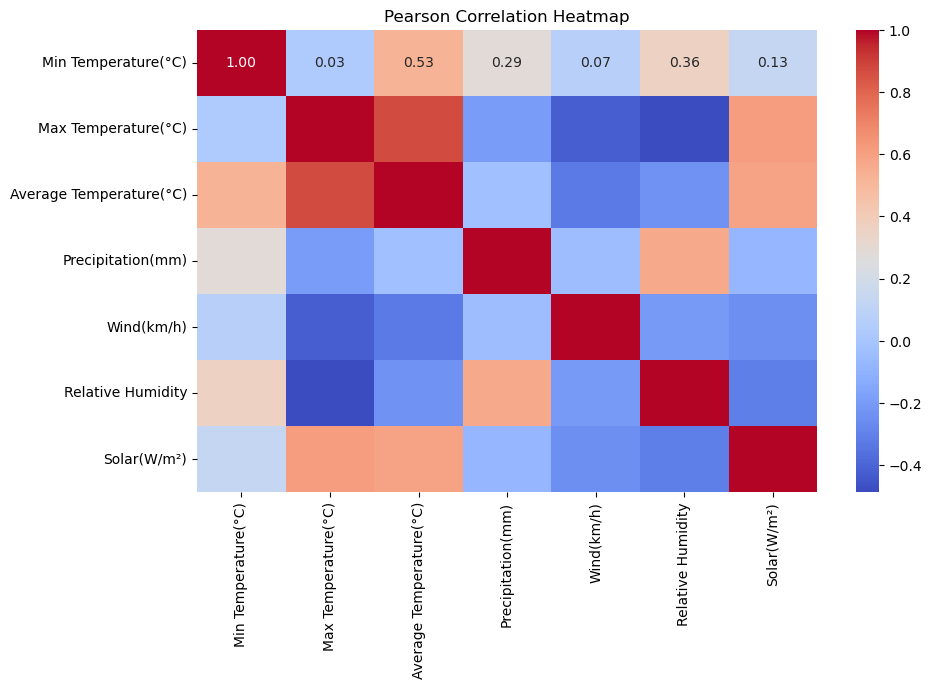

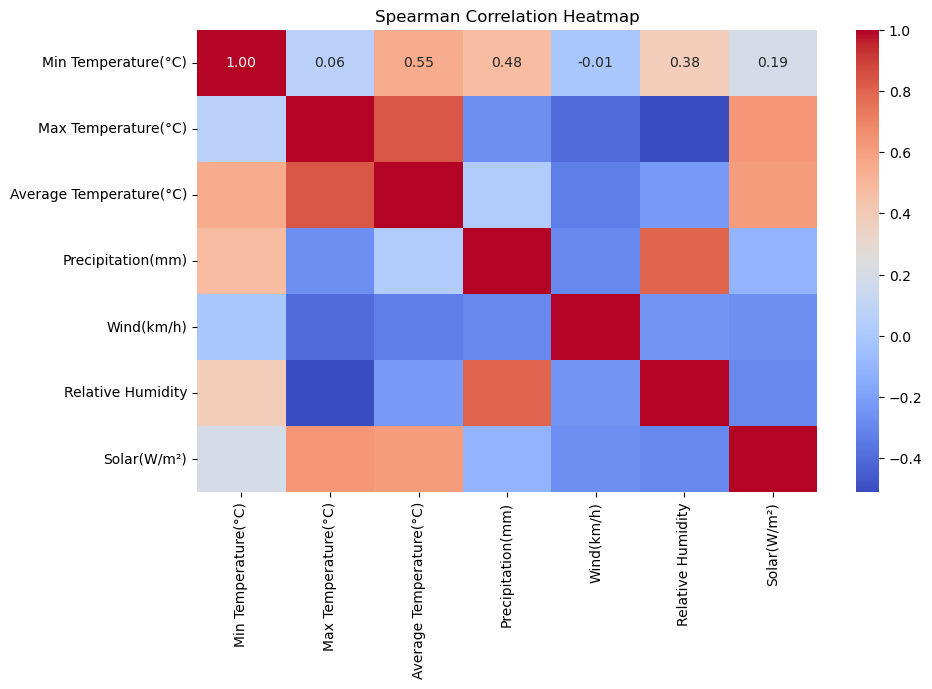

In [45]:
# Visualizing the relationship between variables 


# Pearson Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


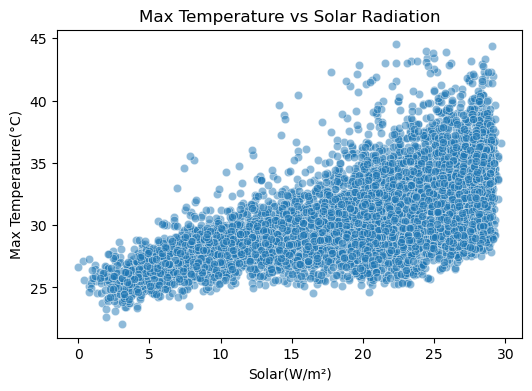

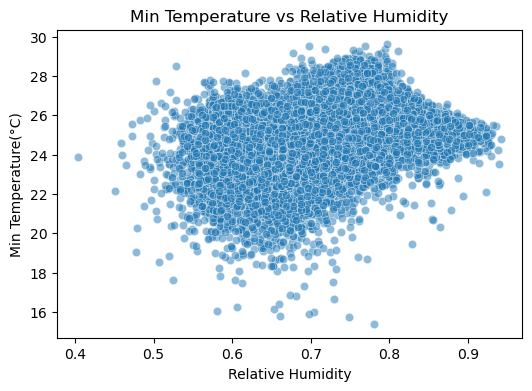

In [46]:
#Scatterplots for Hypothesis Testing
#Max Temp vs. Solar
#Min Temp vs. Humidity

# Scatterplot Max Temp vs Solar
plt.figure(figsize=(6,4))
sns.scatterplot(x='Solar(W/m²)', y='Max Temperature(°C)', data=df, alpha=0.5)
plt.title("Max Temperature vs Solar Radiation")
plt.show()

# Scatterplot Min Temp vs Humidity
plt.figure(figsize=(6,4))
sns.scatterplot(x='Relative Humidity', y='Min Temperature(°C)', data=df, alpha=0.5)
plt.title("Min Temperature vs Relative Humidity")
plt.show()


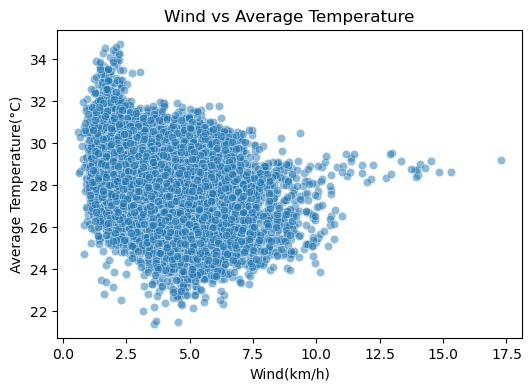

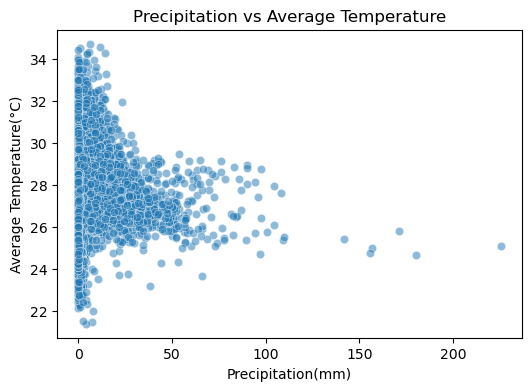

In [47]:
# Scatterplot Wind vs Avg Temp
plt.figure(figsize=(6,4))
sns.scatterplot(x='Wind(km/h)', y='Average Temperature(°C)', data=df, alpha=0.5)
plt.title("Wind vs Average Temperature")
plt.show()

# Scatterplot Precipitation vs Avg Temp
plt.figure(figsize=(6,4))
sns.scatterplot(x='Precipitation(mm)', y='Average Temperature(°C)', data=df, alpha=0.5)
plt.title("Precipitation vs Average Temperature")
plt.show()
